# Implematation of SUPPORT VECTOR REGRESSION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#dataset

In [5]:
df= pd.read_csv("https://raw.githubusercontent.com/swapnilsaurav/MachineLearning/master/3_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
#SUMMARY OF DATASET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.shape

(50, 5)

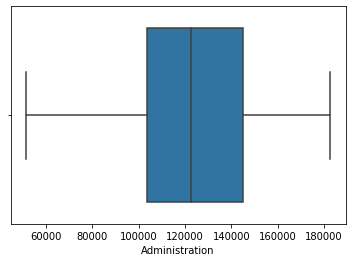

In [10]:
import seaborn as sns
sns.boxplot(x=df['Administration'])
plt.show()

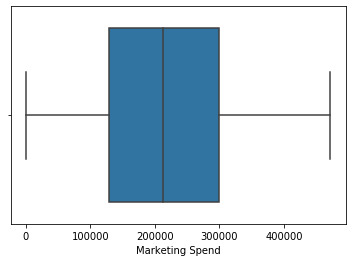

In [11]:
sns.boxplot(x=df['Marketing Spend'])
plt.show()

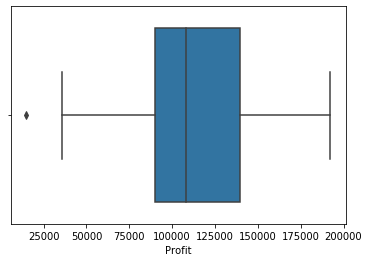

In [12]:
sns.boxplot(x=df['Profit'])
plt.show()

# Preparing dataset

In [15]:
#getting x and y values
x=df.iloc[:, :-1].values
y=df.iloc[:, -1].values

In [17]:
#encoding the catagorical variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X= LabelEncoder()
x[:, 3]=labelencoder_X.fit_transform(x[:, 3])

In [19]:
#create dummy variable
from sklearn.compose import ColumnTransformer
transformer= ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [20]:
#Now a little fit and transform
x= np.array(transformer.fit_transform(x), dtype=np.float)
x= x[:,1:]

In [22]:
#split into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
#train the algorithm
from sklearn.svm import SVR
svr_rbf= SVR(kernel = 'rbf', C=1e3,gamma=0.1)
y_rbf= svr_rbf.fit(x_train, y_train).predict(x_test)
svr_lin= SVR(kernel='linear')
y_lin= svr_lin.fit(x_train, y_train).predict(x_test)
svr_poly= SVR(kernel='poly', C=1e3,degree=2)
y_poly=svr_poly.fit(x_train, y_train).predict(x_test)


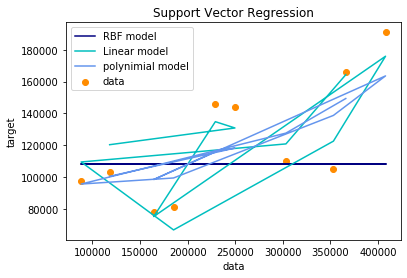

In [28]:
plt.scatter(x_test[:,4], y_test, color='darkorange', label= 'data')
plt.plot(x_test[:,4], y_rbf, color='navy', label='RBF model')
plt.plot(x_test[:,4], y_lin, color='c', label='Linear model')
plt.plot(x_test[:,4], y_poly, color='cornflowerblue', label='polynimial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [32]:
from sklearn import metrics
#linear model
mae= metrics.mean_absolute_error(y_test, y_lin)
mse= metrics.mean_squared_error(y_test, y_lin)
rmse= np.sqrt(mse)
print("RMSE of linear model= ", rmse)
r2= metrics.r2_score(y_test, y_lin)
print("R square of linear model= ", r2)
#RBF model
mae= metrics.mean_absolute_error(y_test, y_rbf)
mse= metrics.mean_squared_error(y_test, y_rbf)
rmse= np.sqrt(mse)
print("RMSE of linear model= ", rmse)
r2= metrics.r2_score(y_test, y_rbf)
print("R square of linear model= ", r2)
#polynomial model
mae= metrics.mean_absolute_error(y_test, y_poly)
mse= metrics.mean_squared_error(y_test, y_poly)
rmse= np.sqrt(mse)
print("RMSE of linear model= ", rmse)
r2= metrics.r2_score(y_test, y_poly)
print("R square of linear model= ", r2)

RMSE of linear model=  12681.132801615448
R square of linear model=  0.8742574194622766
RMSE of linear model=  38544.71036358532
R square of linear model=  -0.16170495227354387
RMSE of linear model=  21966.38945553524
R square of linear model=  0.622702762022858
